# Discovering the Network Structure

You will learn how to dissect an original complex network into constituents of various sizes, shapes, and types: isolates, connected components, cliques, communities, and k-cores, to mention but a few. You will understand the function and place of each type of constituents in the network analysis workflow. At the end, you will get some suggestions about naming the extracted parts, because, as a rule of thumb, you cannot successfully use something that does not have a name. 

In [1]:
# This file produces all simple figures for chapter Cooccurrences
import networkx as nx, community, csv
import matplotlib.style as style, matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import dzcnapy_plotlib as dzcnapy

# Isolates
The smallest distinct element of any network is an isolate: a node that is not connected to any other node (an isolate can still be connected to itself with a loop edge). Though isolates belong to a bigger network, their very existence is against the networking spirit, because the whole idea of networking is that of connectedness. 

In [2]:
G = nx.Graph()
G.add_nodes_from("ABCD") # No edges -- all nodes are isolates
my_isolates = nx.isolates(G)
list(my_isolates)

['A', 'B', 'C', 'D']

In [3]:
G.remove_nodes_from(list(nx.isolates(G)))
list(G.nodes())

[]

# Connected Components
If a network is directed, it may have weakly and strongly connected components. In a strongly connected component, there is always a directed path from any node of the component to any other node of the same component. In a weakly connected component, you are allowed to travel from the source to the destination, but there is no way back.

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


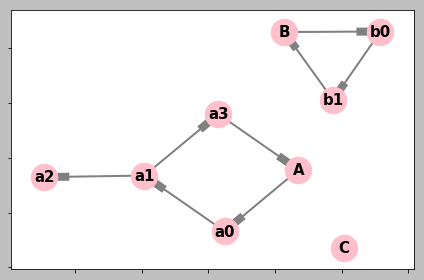

In [4]:
F = nx.DiGraph()
F.add_node("C")
F.add_edges_from([("B", "b0"), ("b0", "b1"), ("b1", "B")])
F.add_edges_from([("A", "a0"), ("a0", "a1"), ("a1", "a2"), ("a1", "a3"),
                  ("a3", "A")])
pos = graphviz_layout(F)
nx.draw_networkx(F, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plt)
dzcnapy.plot("abcNetwork")

In [5]:
list(nx.weakly_connected_components(F))

[{'C'}, {'B', 'b0', 'b1'}, {'A', 'a0', 'a1', 'a2', 'a3'}]

In [6]:
list(nx.strongly_connected_components(F))

[{'C'}, {'B', 'b0', 'b1'}, {'a2'}, {'A', 'a0', 'a1', 'a3'}]

In [7]:
G=nx.Graph(F) # connected_components is implemented only for undirected networks
list(nx.connected_components(G))

[{'C'}, {'B', 'b0', 'b1'}, {'A', 'a0', 'a1', 'a2', 'a3'}]

In [8]:
'''
you can also try 
nx.connected_component_subgraphs 
(for undirected graph)
or 
nx.strongly_connected_component_subgraphs 
nx.weakly_connected_component_subgraphs
(for directed graph)
'''
wcc = nx.subgraph(F, list(nx.weakly_connected_components(F))[1])
len(wcc)

3

In [9]:
'''
Networkx does not have a function to extract the GCC, 
but you can quickly implement this
'''
comp_gen = nx.connected_components(G)
gcc = sorted(comp_gen, key = len, reverse = True)[0]
list(gcc)

['a1', 'a3', 'a2', 'A', 'a0']

# Cores, Shells, Coronas, and Crusts

One of the fundamental tools in modern sociology is core-peripheral analysis. A social network, thereby, consists of two sets of nodes: the core (the nodes that are more or less tightly interconnected) and the periphery (the nodes that are tightly connected to the core, but only weakly, if at all, connected to the other peripheral nodes). 

Traditional social network analysis attacks the core-periphery decomposition via fuzzily defined blockmodeling. We, on the other hand, will start by introducing a more mathematically rigid classification of nodes into four categories: cores, shells, coronas, and crusts.

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


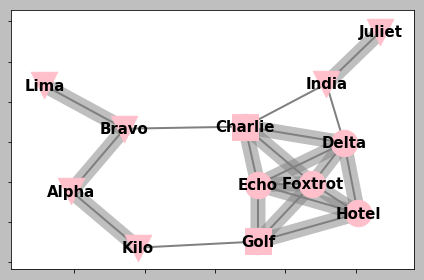

In [10]:
G = nx.Graph(
    (("Alpha", "Bravo"), ("Bravo", "Charlie"), ("Charlie", "Delta"),
     ("Charlie", "Echo"), ("Charlie", "Foxtrot"), ("Delta", "Echo"),
     ("Delta", "Foxtrot"), ("Echo", "Foxtrot"), ("Echo", "Golf"), 
     ("Echo", "Hotel"), ("Foxtrot", "Golf"), ("Foxtrot", "Hotel"), 
     ("Delta", "Hotel"), ("Golf", "Hotel"), ("Delta", "India"), 
     ("Charlie", "India"), ("India", "Juliet"), ("Golf", "Kilo"), 
     ("Alpha", "Kilo"), ("Bravo", "Lima")))
pos = graphviz_layout(G)
core = nx.k_core(G)
crust = nx.k_crust(G)
corona3 = nx.k_corona(G, k=3).nodes()
nx.draw_networkx(G, pos, nodelist=core, **dzcnapy.attrs)
nx.draw_networkx_edges(G, pos, core.edges(), **dzcnapy.thick_attrs)
nx.draw_networkx_edges(G, pos, crust.edges(), **dzcnapy.thick_attrs)
nx.draw_networkx_nodes(G, pos, crust, node_shape='v', **dzcnapy.attrs)
nx.draw_networkx_nodes(G, pos, corona3, node_shape='s', **dzcnapy.attrs)
dzcnapy.set_extent(pos, plt)
dzcnapy.plot("CoresAndCoronas")

# k-core

A core, or, more accurately, a k-core (where k could be any non-negative integer number) is a subgraph of the original network graph such that each node in the subgraph has at least k neighbors. A 0-core is, naturally, the whole graph. A 1-core is a graph with no isolates. A 2-core is a graph where no node has fewer than two neighbors (no node is a part of a pendulum). Any graph usually has more than one core; the core with the largest possible k is called the main core. 

A k-core construction process is iterative:
<ol>
<li>Start with the original graph and remove all nodes that have degree smaller than k and all the incident edges; this will probably result in some of the remaining nodes losing their neighbors and their degree decreasing.</li>

<li>Some nodes that have k neighbors or more may have fewer than k neighbors after trimming; remove them, too, and iterate until no remaining node has fewer than k neighbors.</li>

<li>The remaining nodes form the k-core.</li>
</ol>

In [11]:
list(core)

['Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf', 'Hotel']

# crust

A k-crust is what is left of the original network when we remove the k-core. In other words, the crust is the periphery.

In [12]:
list(crust)

['Alpha', 'Bravo', 'India', 'Juliet', 'Kilo', 'Lima']

# corona

A core has its internal structure. The subgraph of the k-core in which all nodes have exactly k neighbors in the core is called a k-corona. Unlike crusts, coronas are not necessarily connected and may consist of unconnected components—that is, unconnected within the corona.

In [13]:
list(corona3)

['Charlie', 'Golf']

# k-shell

A subset of nodes in k-core but not in (k+1)-core, is called a k-shell. Just like a corona, a shell may consist of components that are not connected within the shell

In [14]:
shell = nx.k_shell(G).nodes()
list(shell)

['Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf', 'Hotel']

# Cliques

GCC and the k-cores are usually too large to be considered a single structural element.

A clique, or, more accurately, a k-clique is a subset of k nodes such that each node is directly connected to each other node in the clique. (We distinguish weak and strong cliques in directed graphs.) Cliques are also known as complete subgraphs. The nodes in a clique may be connected to other nodes as well, but they do not have to—that is, the degree of a node in a k-clique is at least k-1. The principal difference between cliques and connected components is that the path between any two nodes in a clique must have the length of 1, while in a component, the path length is limited only by the graph diameter.

Any single node is a 1-clique, a monad. Any two connected nodes form a 2-clique, a dyad. A triangle of nodes—the result of transitive closure—is a 3-clique, a triad. Monads, dyads, and triads are very common in complex networks.

A maximal clique is a k-clique that cannot be made a (k+1)-clique by adding another node to it. For example, clique (Alpha, Bravo, ..., Echo) in the following figure is a maximal clique, because including any other node (Foxtrot, Golf or Hotel) into it invalidates the complete connectedness property. For example, if Foxtrot is included, then (Alpha, Bravo, ..., Foxtrot) is not a clique anymore. The largest maximal clique in a network graph is called the maximum clique. 

In [22]:
# Generate a 5-clique
G = nx.complete_graph(5, nx.Graph()) 
nx.relabel_nodes(G, 
        dict(enumerate(("Alpha", "Bravo", "Charlie", "Delta", "Echo"))), 
                 copy=False)


In [23]:
# Attach a pigtail to it
G.add_edges_from([
        ("Echo", "Foxtrot"), ("Foxtrot", "Golf"), ("Foxtrot", "Hotel"), 
        ("Golf", "Hotel")])

Networkx provides function nx.find_cliques for finding all maximal cliques in a graph (the largest of which is the maximum clique). The function returns a list generator, and this time, the use of a generator is not a tribute to Pythonic programming style, but a dire necessity. As a matter of fact, larger cliques, especially maximal and maximum cliques, are rare and hard to find. Finding large cliques is a computationally very hard problem (known as an NP-complete problem) and listing all large cliques require exponential time. Unfortunately, function nx.find_cliques generates cliques in a random order, but if you want to get only some maximal cliques, not all of them, then you can stop the generator whenever you want.

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


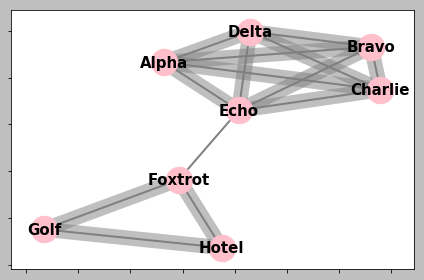

In [24]:
pos = graphviz_layout(G)
nx.draw_networkx(G, pos, **dzcnapy.attrs)
nx.find_cliques(G)
for g in nx.find_cliques(G):
    if len(g) > 2:
        nx.draw_networkx_edges(G, pos, nx.subgraph(G,g).edges(),
                               **dzcnapy.thick_attrs)
dzcnapy.set_extent(pos, plt)
dzcnapy.plot("MaximalClique")

# Clique Communities

By definition, a clique is a very rigid and sensitive network structure. Removing an edge from a k-clique transforms it into two interwound, partially overlapping, adjacent (k-1)-cliques.

In [25]:
from networkx.algorithms.community import k_clique_communities
list(k_clique_communities(G, k = 3))
# returns a fronzenset
# A frozenset is an immutable version of a Python set. 
# Because of its immutability, it can be used as key in a dictionary, but it can be cast to a set, 
# if any modifications are necessary.

[frozenset({'Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo'}),
 frozenset({'Foxtrot', 'Golf', 'Hotel'})]

Intuitively, you may feel that all k nodes somehow belong together and the missing edge could have been a victim of a measurement or data entry error or improper slicing (​Slice Weighted Networks​) or conversion from a directed graph. Nonetheless, nx.find_cliques will not recognize your k nodes as a clique (because they are not). Instead, it will report two smaller cliques, leaving it up to you to notice that they actually share k-1 nodes and their separation may have been caused by a missing edge.

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


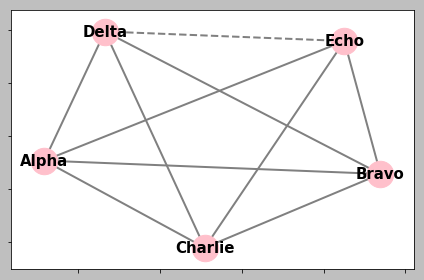

In [26]:
G1 = nx.complete_graph(5, nx.Graph())
nx.relabel_nodes(G1, dict(enumerate(("Alpha", "Bravo", "Charlie", 
                                    "Delta", "Echo"))), copy=False)
missing = ("Delta", "Echo")
G1.remove_edge(*missing)
pos = graphviz_layout(G1)
nx.draw_networkx(G1, pos, **dzcnapy.attrs)
nx.draw_networkx_edges(G1, pos, edgelist=(missing,), style='dashed', 
                       **dzcnapy.attrs)
dzcnapy.set_extent(pos, plt)
dzcnapy.plot("CliqueCommunity")

# Modularity Based Communities

The fuzziest and most flexible form of node organization in a complex network is network communities based on modularity. They are sometimes also called clusters or groups, and are not to be confused with clique communities.

Let’s start with modularity first, and assume that the network has been already partitioned into non-overlapping communities (later you’ll figure out, how). According to Newman’s definition, modularity m is the fraction of the edges that fall within the given communities minus the expected fraction if edges were distributed at random, while conserving the nodes degrees. The value of m is in the range from -0.5 (inclusive) to 1 (exclusive). If most of the edges are incident to the nodes within the same community, the modularity is very high, close (but not equal) to 1, and the proposed partition describes a very good community structure. The modularity of -0.5 means that the nodes within the same community are not adjacent at all—the proposed community structure is worse than random; in fact, you are probably dealing with anti-communities that induce bi- and multi-partite networks.

Ideally, you want to partition a network in such a way that the modularity is as high as possible. The modularity of 0.6 and above corresponds to networks that have clearly visible community structure. Unfortunately, getting the largest modularity is hard for at least three reasons:
<ol>
<li>The problem of optimal partitioning is NP-complete with respect to the network size. To find the best partition, you should calculate modularity for every possible partition and then select the best one. The number of partitions is simply too large, and the problem does not have a feasible exact solution for any non-trivial graph.</li>

<li>Approximate solutions (e.g., the most popular louvain algorithm) do a pretty good job, but some of them are probabilistic, which means every time you run them, you may end up having slightly different partitions.</li>

<li>The resolution of modularity-based methods scales poorly, they overlook small communities in large networks. A plausible solution is to partition the network recursively into smaller and smaller communities.</li>
</ol>

Anaconda, the most popular Python distribution, does not currently include tools for modularity-based community detection. Fortunately the tool exists and can be easily installed via pip. It is called python-louvain. The externally visible name of the module is community, and you import it under this name.

Module community uses the <b>louvain algorithm</b> that optimizes network modularity. The discovered communities are represented as a partition: a dictionary with node labels as keys and integer community identifiers as values. The module also calculates the modularity of the partition with respect to the original network.

In [27]:
'''
Modularity based communities
'''
part = community.best_partition(G)
print(part)

{'Alpha': 0, 'Bravo': 0, 'Charlie': 0, 'Delta': 0, 'Echo': 0, 'Foxtrot': 1, 'Golf': 1, 'Hotel': 1}


In [28]:
community.modularity(part,G)

0.3035714285714286

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


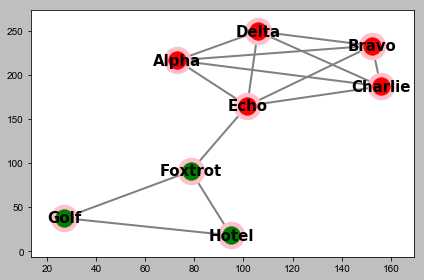

In [29]:
pos = graphviz_layout(G)
nx.draw_networkx(G, pos, **dzcnapy.attrs)
size = float(len(set(part.values()))) # size = 2
count = 0.
colors = ['r','g']
for com in set(part.values()) : 
    count += 1.
    list_nodes = [nodes for nodes in part.keys()
                  if part[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_color = colors[com])


dzcnapy.plot("Communities")

In [30]:
[nodes for nodes in part.keys()
                  if part[nodes] == 1.0]

['Foxtrot', 'Golf', 'Hotel']

In [31]:
induced = community.induced_graph(part, G)
induced.nodes()

NodeView((0, 1))

In [32]:
induced.edges(data=True)

EdgeDataView([(0, 0, {'weight': 10}), (0, 1, {'weight': 1}), (1, 1, {'weight': 3})])

In [33]:
'''
Explore communities with Pandas
'''
import pandas as pd
part_as_series = pd.Series(part)
part_as_series.sort_values()

Alpha      0
Bravo      0
Charlie    0
Delta      0
Echo       0
Foxtrot    1
Golf       1
Hotel      1
dtype: int64

In [34]:
# how big are the communities?

part_as_series.value_counts()

0    5
1    3
dtype: int64

# Perform Blackmodeling

The construction of the graph of maximal cliques or communities is a special case of blockmodeling—grouping network nodes according to some meaningful definition of equivalence and replacing them with synthetic “supernodes.” A more general function nx.blockmodel(G,part) takes a graph G and its partition part as a list of node collections (lists or sets), and creates an induced graph.

Unlike nx.make_max_clique_graph and community.induced_graph, 
nx.blockmodel requires that the partition includes every node in the 
original graph exactly once. You can manually remove the offending overlapping 
clique from a clique partition, if you want.

<b>Note</b>: nx.blockmodel not included in networkx2.0 distribution. Use quotient_graph instead


In [35]:
cliques = list(nx.find_cliques(nx.Graph(G)))
list(cliques)

[['Echo', 'Foxtrot'],
 ['Echo', 'Charlie', 'Alpha', 'Bravo', 'Delta'],
 ['Golf', 'Foxtrot', 'Hotel']]

In [37]:
# we do not want cliques[2] = ['Echo', 'Foxtrot']
synthetic = nx.quotient_graph(G,[cliques[1],cliques[2]])
synthetic.edges()

EdgeView([(frozenset({'Charlie', 'Alpha', 'Echo', 'Delta', 'Bravo'}), frozenset({'Foxtrot', 'Golf', 'Hotel'}))])

# Name Extracted Blocks

From the data scientific point of view, network analysis at the macroscopic level (extraction of communities, cliques, and other structural blocks) is an example of unsupervised machine learning. The goal of unsupervised machine learning is to infer a network’s hidden structure in the absence of “labels”: node and edge attributes (except, perhaps, the edge weights).

The unearthed blocks suffer from two major interrelated problems:
<ul>
<li>It is not clear what they mean.</li>
<li>They are nameless.</li>
</ul>

In fact, if you knew the purpose or nature of a block, you would give it a name, and if you knew the name, you would guess what its purpose or nature is.

Selecting a good name for a block can be done in at least three ways.

<ol>
<li>You can use <b>your intelligence</b>: look at the individual node labels and generalize. A block that has labels “car,” “truck,” “train,” and “sled” probably deserves to be called “land transportation,” and “hand,” “arm,” “leg,” “head,” and “chest” belong to the block “body parts.” If unsure or confused, hire a <b>subject matter expert (SME)</b> whose job is to know why nodes X and Y ended up in the same block.</li>

<li>Better yet, hire a lot of <b>subject-matter experts—or sort-of-experts</b>. Amazon Mechanical Turk (AMT) offers a way to put any question to literally thousands of people (“workers,” in the AMT terminology) for a very modest price. Ask 10,000 AMT workers what “foos,” “bars,” and “foobars” have in common. If the terms have anything in common at all, you will most probably get an answer supported by a solid majority of workers.</li>

<li>Finally, if you cannot hire an SME and would rather not mess up with AMT, you can still generate block labels from its data. If the nodes in a block differ, e.g., in size or weight, take the largest of them (say, “head”) and use its label to synthesize the block label (e.g., “the ’head’ group). If all nodes have same attributes or have no attributes at all, choose the first node in the alphabetic order (“the ’arm’ group”).</li>
</ol>